# Zillow Neighborhood Dataset Analysis 



- It is strongly recommended you use the standard `pd`, `np`, `plt` and `sns` namespaces for these popular libraries


In [1]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

## Load the Zillow dataset

In [2]:
df = pd.read_csv("Neighborhood_Zhvi_AllHomes.csv")
df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02
0,274772,Northeast Dallas,Dallas,TX,Dallas-Fort Worth-Arlington,Dallas County,1,135800.0,135500.0,134900.0,...,315500,316800,317500,317700,318500,320600,324500,330200,336400,339900
1,192689,Paradise,Las Vegas,NV,Las Vegas-Henderson-Paradise,Clark County,2,119400.0,119400.0,119300.0,...,241100,244400,247600,251200,254600,257600,260100,261500,262200,262800
2,270958,Upper West Side,New York,NY,New York-Newark-Jersey City,New York County,3,299500.0,299700.0,299600.0,...,1399100,1391700,1383800,1379000,1370200,1360500,1349200,1336000,1323800,1317100
3,118208,South Los Angeles,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,4,122700.0,122900.0,123100.0,...,462200,464700,467000,469400,472000,474400,476300,478700,482200,484800
4,270957,Upper East Side,New York,NY,New York-Newark-Jersey City,New York County,5,339400.0,339900.0,340500.0,...,1383300,1383300,1367200,1357300,1345000,1327500,1312800,1301500,1287200,1275600


In [3]:
df.shape

(7439, 282)

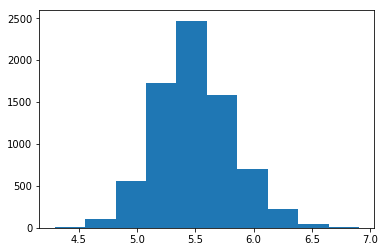

In [5]:
plt.hist(np.log10(df["2019-02"]));

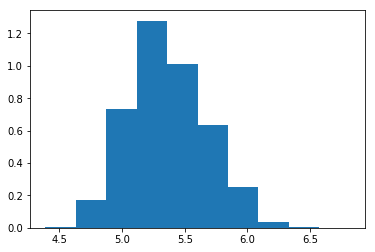

In [14]:
plt.hist(np.log10(df["2005-02"].dropna()), normed = True);

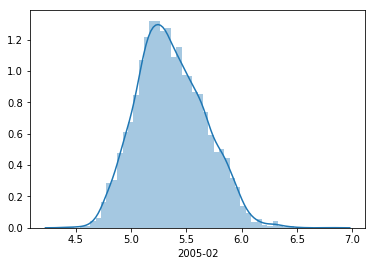

In [10]:
sns.distplot(np.log10(df["2005-02"].dropna()));

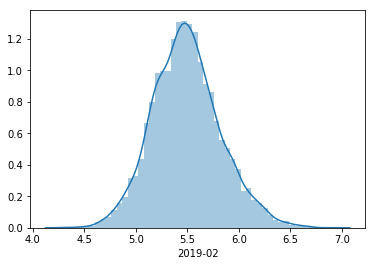

In [11]:
sns.distplot(np.log10(df["2019-02"]));

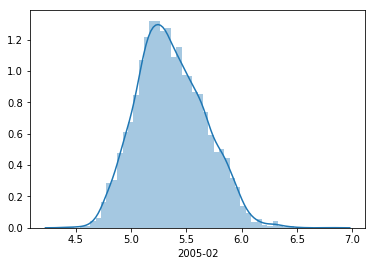

In [13]:
sns.distplot(np.log10(df["2005-02"].dropna()));

## San Diego Analysis

Let's focus on understanding price changes in San Diego over time.

### Tidy Data
- Each variable you measure should be in one column.
- Each different observation of that variable should be in a different row.


In [15]:
df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02
0,274772,Northeast Dallas,Dallas,TX,Dallas-Fort Worth-Arlington,Dallas County,1,135800.0,135500.0,134900.0,...,315500,316800,317500,317700,318500,320600,324500,330200,336400,339900
1,192689,Paradise,Las Vegas,NV,Las Vegas-Henderson-Paradise,Clark County,2,119400.0,119400.0,119300.0,...,241100,244400,247600,251200,254600,257600,260100,261500,262200,262800
2,270958,Upper West Side,New York,NY,New York-Newark-Jersey City,New York County,3,299500.0,299700.0,299600.0,...,1399100,1391700,1383800,1379000,1370200,1360500,1349200,1336000,1323800,1317100
3,118208,South Los Angeles,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,4,122700.0,122900.0,123100.0,...,462200,464700,467000,469400,472000,474400,476300,478700,482200,484800
4,270957,Upper East Side,New York,NY,New York-Newark-Jersey City,New York County,5,339400.0,339900.0,340500.0,...,1383300,1383300,1367200,1357300,1345000,1327500,1312800,1301500,1287200,1275600


- Our data is not tidy! 
Each price for each year is a different observation so should be in different row!

- `pd.melt` reshapes our data into the tidy format

In [16]:
df_m = pd.melt(df, id_vars=['RegionID', 'RegionName', 'City', 'State', 
                            'Metro', 'CountyName','SizeRank'])

df_m.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,variable,value
0,274772,Northeast Dallas,Dallas,TX,Dallas-Fort Worth-Arlington,Dallas County,1,1996-04,135800.0
1,192689,Paradise,Las Vegas,NV,Las Vegas-Henderson-Paradise,Clark County,2,1996-04,119400.0
2,270958,Upper West Side,New York,NY,New York-Newark-Jersey City,New York County,3,1996-04,299500.0
3,118208,South Los Angeles,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,4,1996-04,122700.0
4,270957,Upper East Side,New York,NY,New York-Newark-Jersey City,New York County,5,1996-04,339400.0


In [21]:
df_m.shape

(2045725, 9)

In [24]:
df_sd = df_m[df_m.CountyName == 'San Diego County']

df_sd.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,variable,value
86,343228,Southwest,Chula Vista,CA,San Diego-Carlsbad,San Diego County,87,1996-04,139400.0
88,116625,Mira Mesa,San Diego,CA,San Diego-Carlsbad,San Diego County,89,1996-04,153900.0
157,343244,Northwest,Chula Vista,CA,San Diego-Carlsbad,San Diego County,158,1996-04,147600.0
168,118673,University City,San Diego,CA,San Diego-Carlsbad,San Diego County,169,1996-04,175700.0
174,117557,Rancho Penasquitos,San Diego,CA,San Diego-Carlsbad,San Diego County,175,1996-04,202400.0


Lets explore how the median price of homes in each region has changed over time. 

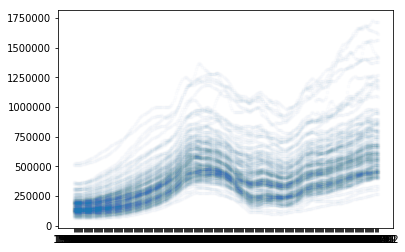

In [38]:
plt.plot(df_sd.variable, df_sd.value, '.', alpha = .01);

In [30]:
df_sd[df_sd.variable == "2005-02"].head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,variable,value
788620,343228,Southwest,Chula Vista,CA,San Diego-Carlsbad,San Diego County,87,2005-02,459700.0
788622,116625,Mira Mesa,San Diego,CA,San Diego-Carlsbad,San Diego County,89,2005-02,511300.0
788691,343244,Northwest,Chula Vista,CA,San Diego-Carlsbad,San Diego County,158,2005-02,479800.0
788702,118673,University City,San Diego,CA,San Diego-Carlsbad,San Diego County,169,2005-02,577800.0
788708,117557,Rancho Penasquitos,San Diego,CA,San Diego-Carlsbad,San Diego County,175,2005-02,644900.0


- We get a good idea of the trends but over-plotting on the x-ticks makes it impossible to read. 

- We need to reduce the resolution of the x-ticks. 

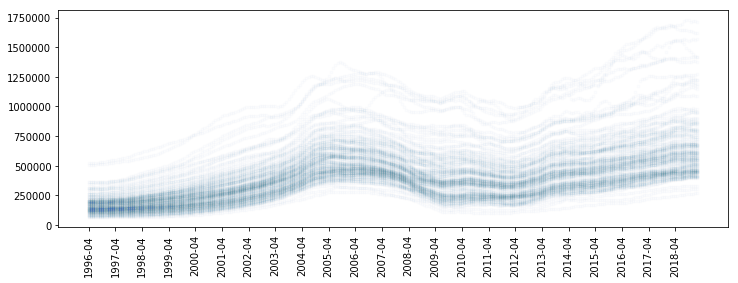

In [39]:
plt.figure(figsize=(12,4))
plt.plot(df_sd.variable, df_sd.value, '.', alpha = .01);

labels = []
pos = []
for i, item in enumerate(pd.unique(df_sd.variable)):
    if i % 12 ==0:
        pos.append(i)
        labels.append(item)

plt.xticks(pos, labels, rotation = 90);


In [43]:
region_names = list(pd.unique(df_sd.RegionName))
#len(region_names)
region_names[0]

'Southwest'

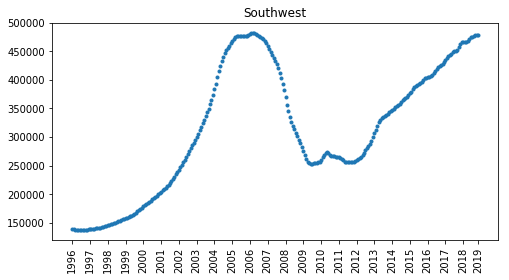

In [44]:
plt.figure(figsize=(8,4))
df_region = df_sd[df_sd.RegionName == region_names[0]]
plt.plot(df_region.variable, df_region.value, '.')
labels = []
pos = []
for i, item in enumerate(pd.unique(df_region.variable)):
    if i % 12 ==0:
        pos.append(i)
        labels.append(item.split("-")[0])
        
# inclue the last tick in the positions even 
# if it is not modulo 12
pos.append(i)
labels.append(item.split("-")[0])
plt.xticks(pos, labels, rotation = 90);
plt.title(region_names[0]);

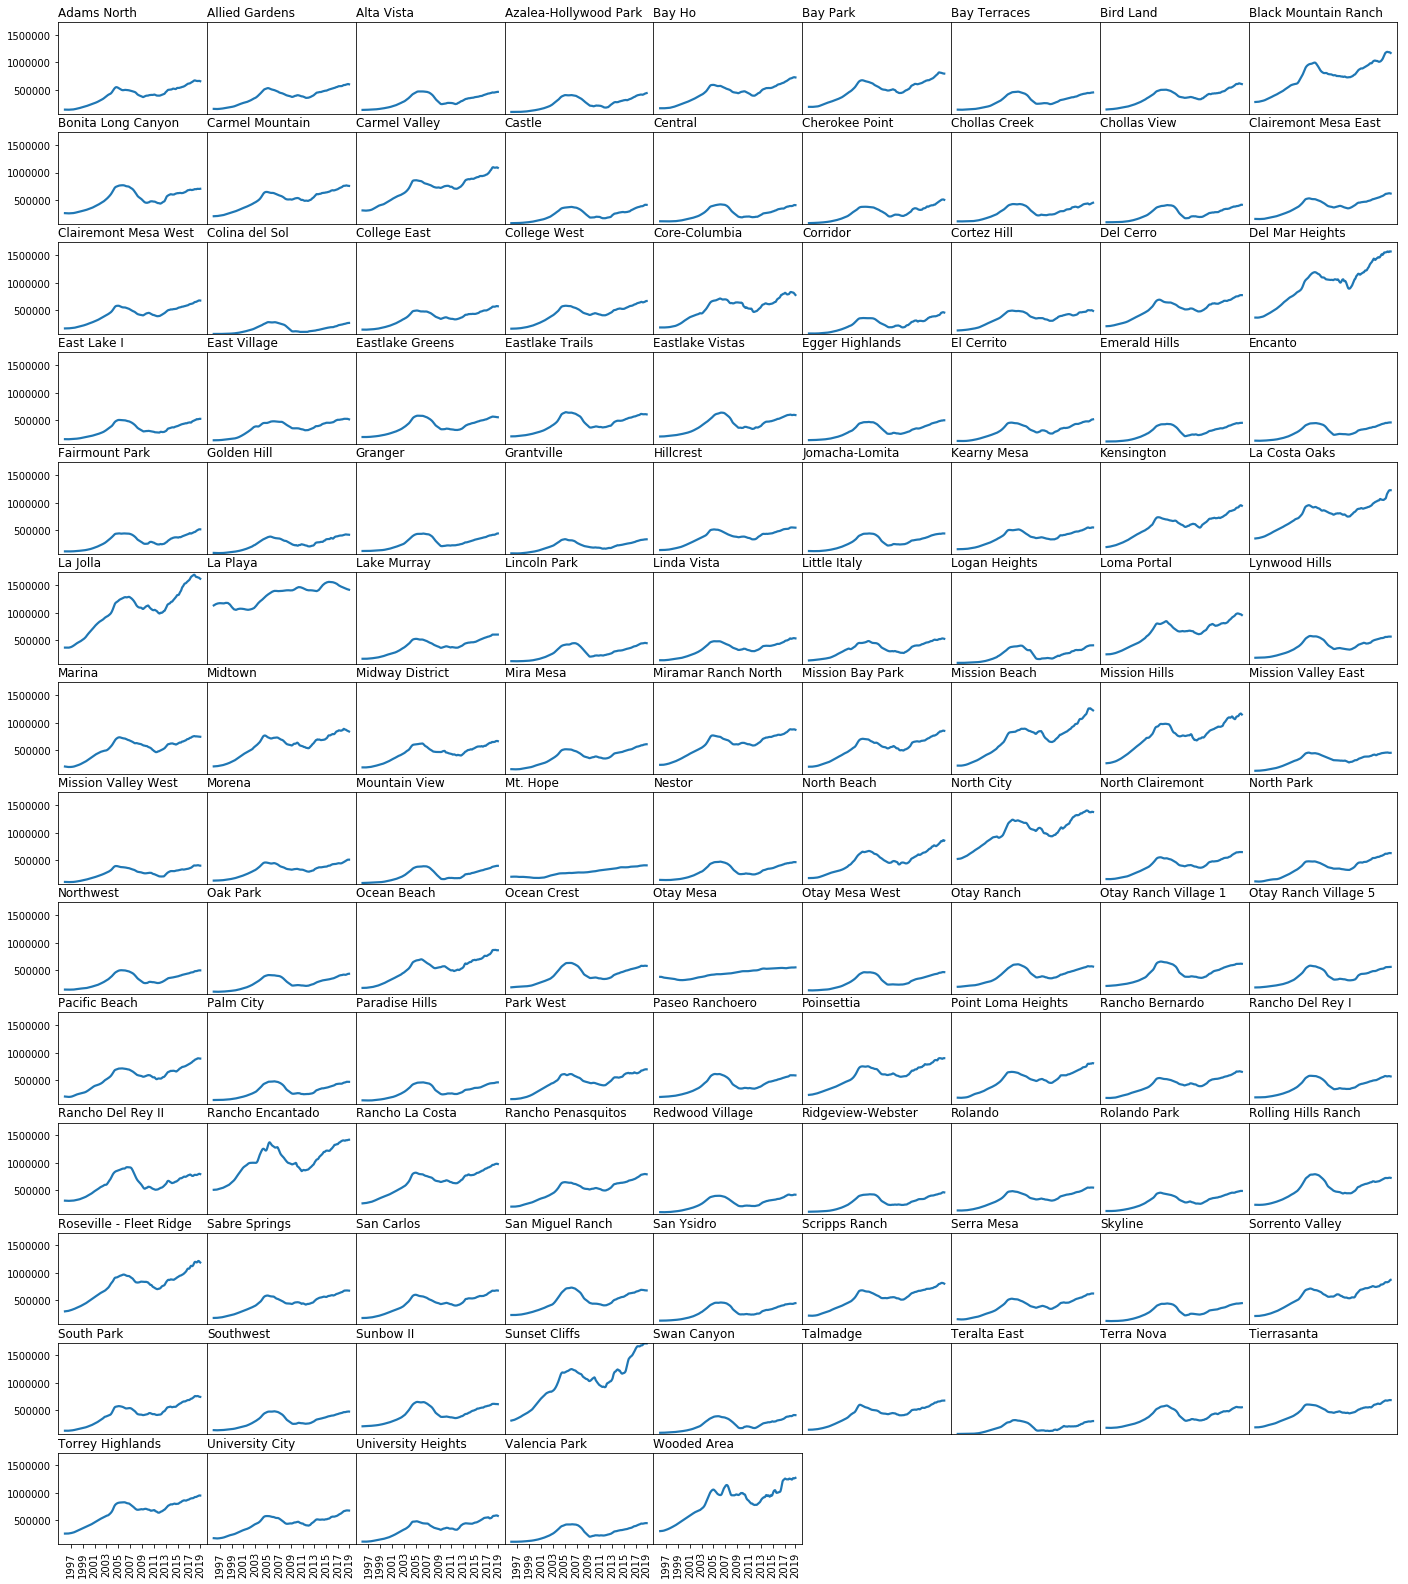

In [49]:
plt.figure(figsize = (24,28))
num_cols_in_subplot = 9
for i, region_name in enumerate(sorted(region_names)):
    plt.subplot(len(region_names)//num_cols_in_subplot+1, num_cols_in_subplot, 
                i+1)
    # subset the data to just a specific region 
    df_region = df_sd[df_sd.RegionName == region_name]
    plt.plot(df_region.variable, df_region.value, linewidth = 2.2, 
             label = region_name)
    plt.ylim([np.min(df_sd.value), np.max(df_sd.value)])
    
    # only plot the y ticks that apppear on left
    if i%num_cols_in_subplot != 0:
        plt.yticks([])
    
    # only plot the x ticks that apppear on bottom
    if i < (len(region_names)//num_cols_in_subplot)*(num_cols_in_subplot):
        plt.xticks([]);  
    else:
        # lets just plot ticks for every other year
        # starting from an odd year
        plt.xticks(pos[1::2], labels[1::2], rotation = 90);
    
    plt.title(region_name, loc = "left")
    plt.subplots_adjust(wspace=0, hspace=.2)

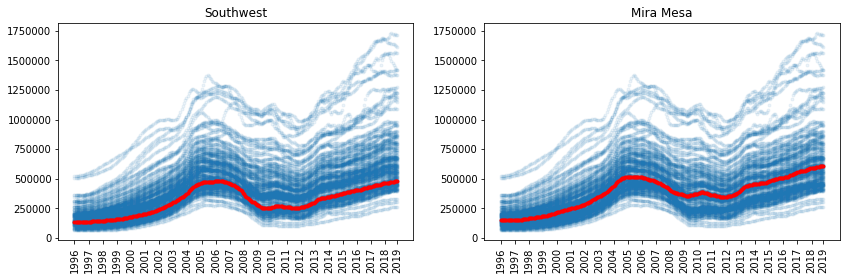

In [46]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
df_region = df_sd[df_sd.RegionName == region_names[0]]
plt.plot(df_sd.variable, df_sd.value, '.', alpha = .08);
plt.plot(df_region.variable, df_region.value, '.', color = "red")
plt.xticks(pos, labels, rotation = 90);
plt.title(region_names[0]);

plt.subplot(1,2,2)
df_region = df_sd[df_sd.RegionName == region_names[1]]
plt.plot(df_sd.variable, df_sd.value, '.', alpha = .08);
plt.plot(df_region.variable, df_region.value, '.', color = "red")
plt.xticks(pos, labels, rotation = 90);
plt.title(region_names[1]);



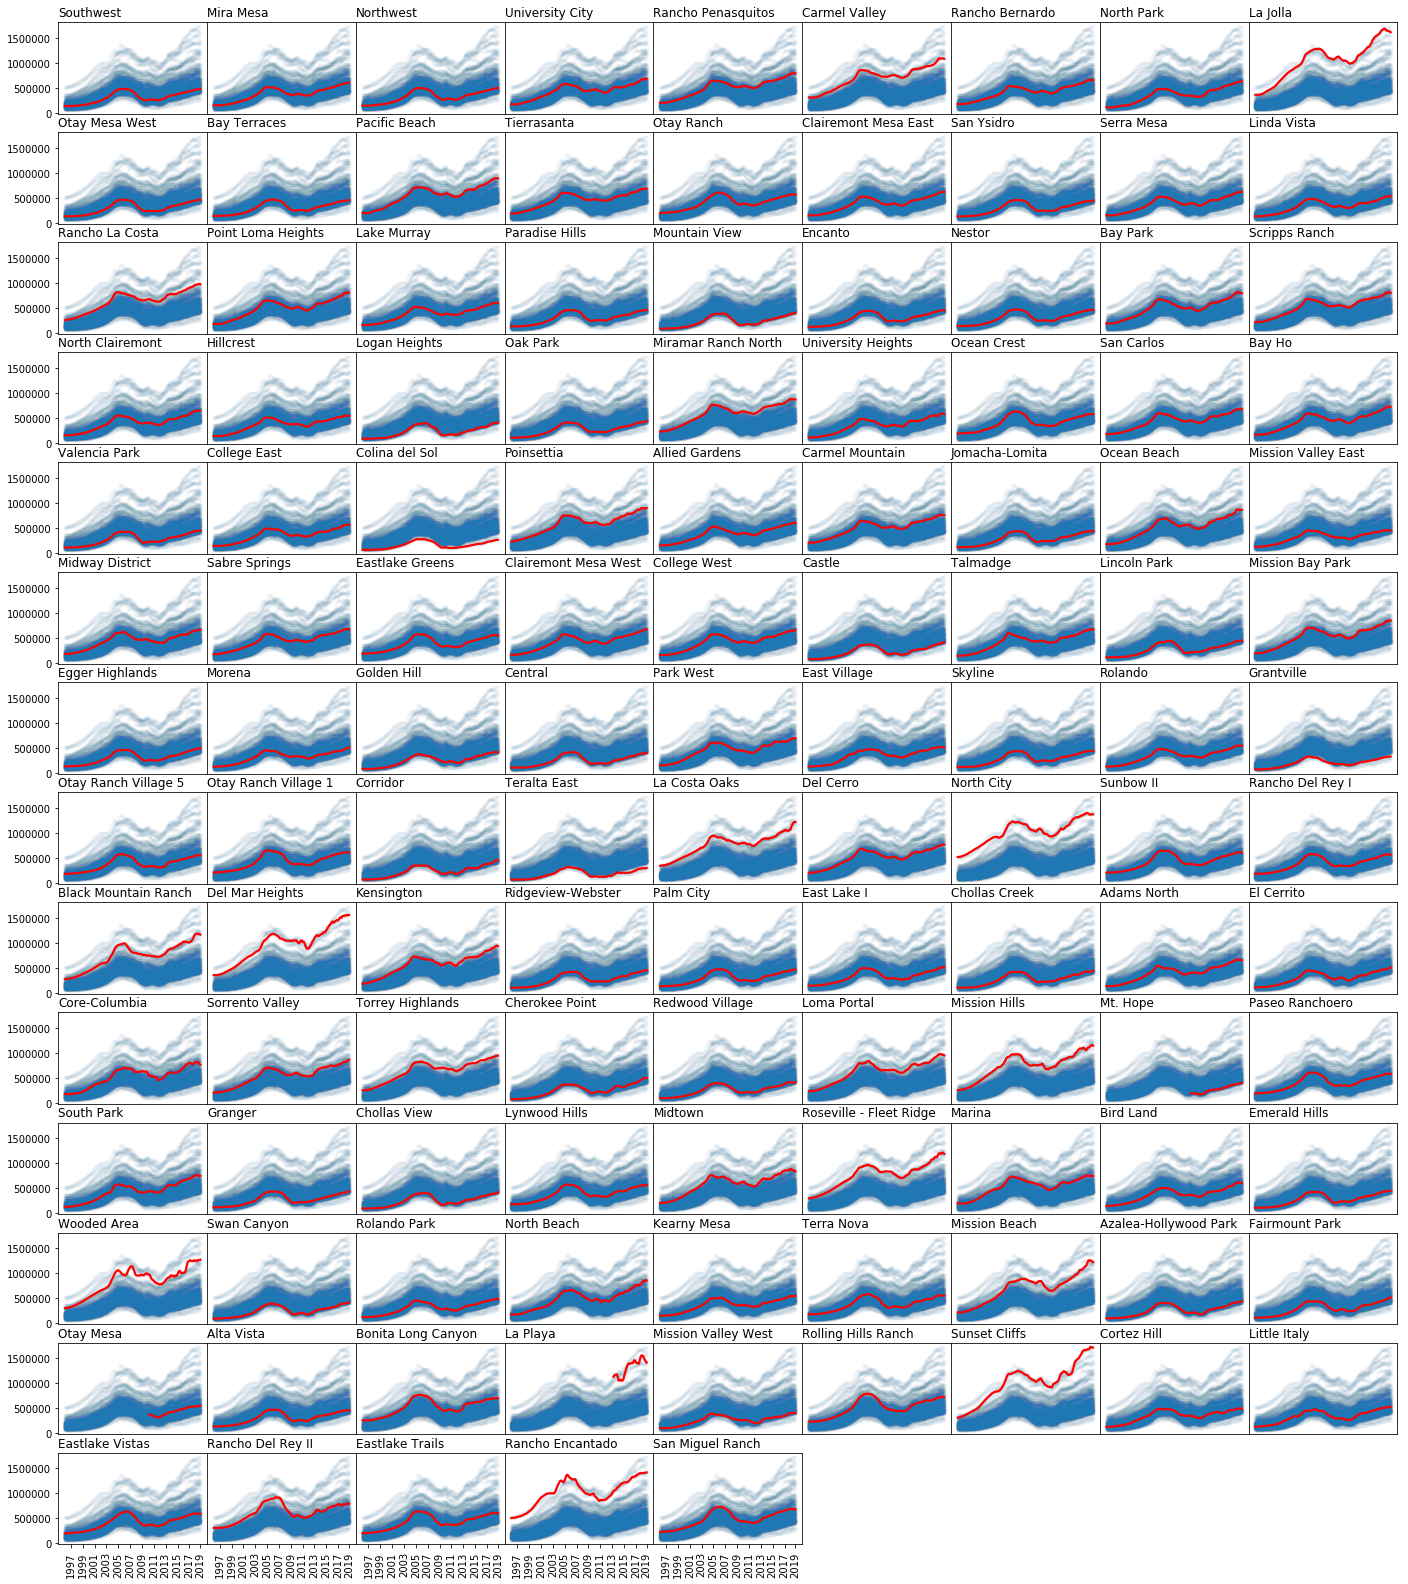

In [47]:
plt.figure(figsize = (24,28))

num_cols_in_subplot = 9

for i, region_name in enumerate(sorted(region_names):
    plt.subplot(len(region_names)//num_cols_in_subplot+1, num_cols_in_subplot, 
                i+1)
    # plot all the regions but very lightly small alpha
    plt.plot(df_sd.variable, df_sd.value, '.', alpha = .01);
    # subset the data to just a specific region 
    df_region = df_sd[df_sd.RegionName == region_name]
    plt.plot(df_region.variable, df_region.value, linewidth = 2.2, 
             color = "red", label = region_name)
    
    # only plot the y ticks that apppear on left
    if i%num_cols_in_subplot != 0:
        plt.yticks([])
    
    # only plot the x ticks that apppear on bottom
    if i < (len(region_names)//num_cols_in_subplot)*(num_cols_in_subplot):
        plt.xticks([]);  
    else:
        # lets just plot ticks for every other year
        # starting from an odd year
        plt.xticks(pos[1::2], labels[1::2], rotation = 90);
    
    plt.title(region_name, loc = "left")
    plt.subplots_adjust(wspace=0, hspace=.2)

### Bubble Analysis

- The peak of the bubble occurred around 2005. 
- Instead of looking at prices at all time points in the data, lets compare prices at the height of the bubble with today. 
- We pick February 2005 as the "height" to correspond with the 14 years prior to the latest observations we have. 

In [51]:
df_latest = df_sd[df_sd.variable == df_sd.variable.max()]
df_bubble = df_sd[df_sd.variable == '2005-02']
df_change = pd.concat([df_bubble, df_latest], ignore_index=True)

df_change.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,variable,value
0,343228,Southwest,Chula Vista,CA,San Diego-Carlsbad,San Diego County,87,2005-02,459700.0
1,116625,Mira Mesa,San Diego,CA,San Diego-Carlsbad,San Diego County,89,2005-02,511300.0
2,343244,Northwest,Chula Vista,CA,San Diego-Carlsbad,San Diego County,158,2005-02,479800.0
3,118673,University City,San Diego,CA,San Diego-Carlsbad,San Diego County,169,2005-02,577800.0
4,117557,Rancho Penasquitos,San Diego,CA,San Diego-Carlsbad,San Diego County,175,2005-02,644900.0


## Slope Graphs

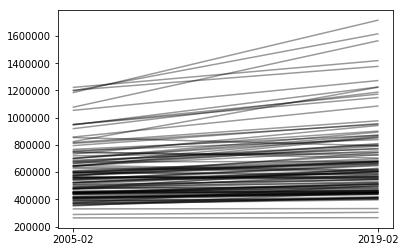

In [53]:
for i, region_name in enumerate(region_names):
    df_region = df_change[df_change.RegionName == region_name]
    plt.plot(df_region.variable, df_region.value, color = "k", alpha = .4)


We have too much over-plotting! 

Over-plotting solution: only plot the regions that have "large" changes. Might be also interesting to look at regions that went "negative" (have yet to recover from the crash). 

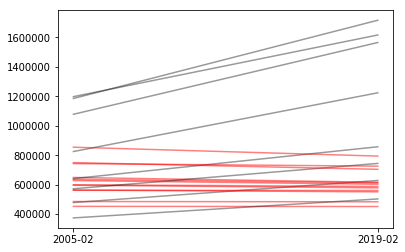

In [54]:
for i, region_name in enumerate(region_names):
    df_region = df_change[df_change.RegionName == region_name]
    change = df_region.iloc[1,:]["value"] - df_region.iloc[0,:]["value"]
    percent_change = 100*change/df_region.iloc[0,:]["value"]
    if (change > 0) & (percent_change > 30):
        plt.plot(df_region.variable, df_region.value, color = "k", alpha = .4)
    elif change < 0:
        plt.plot(df_region.variable, df_region.value, color = "r", alpha = .5)

Which neighborhoods are the biggest movers? Which neighborhoods did not recover?

In [63]:
import matplotlib

matplotlib.__version__

'2.1.2'

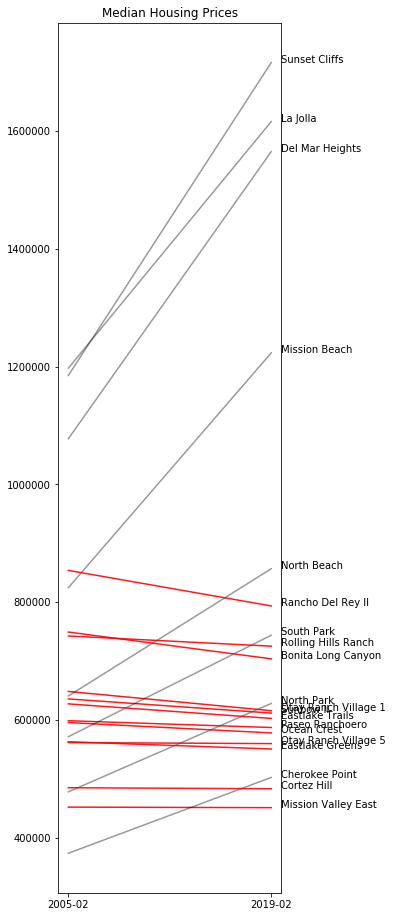

In [55]:
fig, ax = plt.subplots(figsize=(4, 16))
for i, region_name in enumerate(region_names):
    df_region = df_change[df_change.RegionName == region_name]
    change = df_region.iloc[1,:]["value"] - df_region.iloc[0,:]["value"]
    percent_change = 100*change/df_region.iloc[0,:]["value"]
    if (change > 0) & (percent_change > 30):
        ax.plot(df_region.variable, df_region.value, color = "k", alpha = .4)
        ax.text(1.05, df_region.value.iloc[1], region_name, transform=ax.transData)

    elif change < 0:
        ax.plot(df_region.variable, df_region.value, color = "r", alpha = .9)
        ax.text(1.05, df_region.value.iloc[1], region_name, transform=ax.transData)

plt.title("Median Housing Prices");       

Percent change is often much more interesting. 

In [56]:
# undo a pivot
df_sd_change = df_change.pivot(index = 'RegionName', columns = "variable", 
                               values = 'value')

df_sd_change.reset_index(inplace=True)

df_sd_change.head()

variable,RegionName,2005-02,2019-02
0,Adams North,547100.0,659000.0
1,Allied Gardens,523700.0,603100.0
2,Alta Vista,444800.0,465100.0
3,Azalea-Hollywood Park,398100.0,443200.0
4,Bay Ho,591900.0,727800.0


We will create a new variable `percent_change` that has the percent change between the latest entry in our data with the "peak" bubble.

In [57]:
df_sd_change["percent_change"] = 100*(df_sd_change["2019-02"] - 
                                      df_sd_change["2005-02"])/df_sd_change["2005-02"]

In [58]:
np.min(df_sd_change.percent_change), np.max(df_sd_change.percent_change)

(-7.060063224446786, 48.332727052261426)

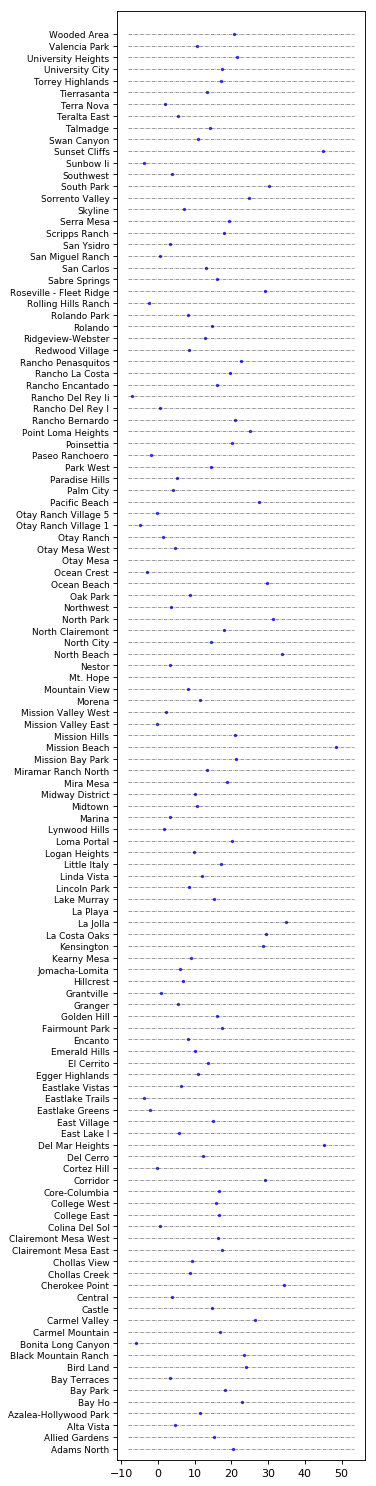

In [60]:
fig, ax = plt.subplots(figsize=(4,24), dpi= 80)
ax.hlines(y=np.arange(df_sd_change.shape[0]), alpha=0.7, 
          xmin=np.min(df_sd_change.percent_change) -1, 
          xmax=np.max(df_sd_change.percent_change) + 5, 
          linewidth=.5, linestyles='dashdot')
ax.scatter(y=np.arange(df_sd_change.shape[0]), 
           x=df_sd_change.percent_change, color='blue',s = 4, 
           alpha=0.7);


ax.set_yticks(np.arange(df_sd_change.shape[0]))
ax.set_yticklabels(df_sd_change.RegionName.str.title(), 
                   fontdict={'horizontalalignment': 'right',
                             'size': 8});
ax.set_ylim(-1, 123);

Alphabetically showing data is almost never useful. It is much more informative to display in *quantitative* sort

In [61]:
df_sd_change.sort_values(["percent_change"], inplace=True)

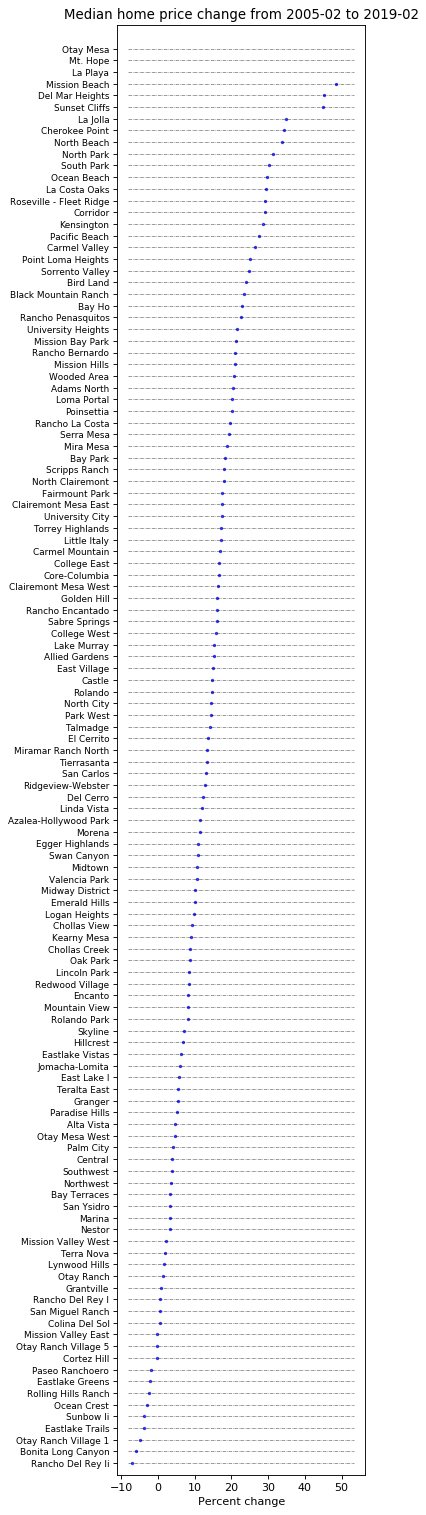

In [62]:
fig, ax = plt.subplots(figsize=(4,24), dpi= 80)
ax.hlines(y=np.arange(df_sd_change.shape[0]), alpha=0.7, 
          xmin=np.min(df_sd_change.percent_change) -1, 
          xmax=np.max(df_sd_change.percent_change) + 5, 
          linewidth=.5, linestyles='dashdot')
ax.scatter(y=np.arange(df_sd_change.shape[0]), 
           x=df_sd_change.percent_change, color='blue',s = 4, 
           alpha=0.7);

ax.set_title('Median home price change from 2005-02 to 2019-02', 
             fontdict={'size':12})
ax.set_xlabel('Percent change')
ax.set_yticks(np.arange(df_sd_change.shape[0]))
ax.set_yticklabels(df_sd_change.RegionName.str.title(), 
                   fontdict={'horizontalalignment': 'right',
                             'size': 8});

ax.set_ylim(-1, 123);

## Price changes

In [64]:
monthly_change = df_sd.groupby("RegionName")["value"].apply(lambda x: 
                                                 100*x.diff()/np.hstack((1,x[:-1])))
df_sd["monthly_change"] = monthly_change
df_sd.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,variable,value,monthly_change
86,343228,Southwest,Chula Vista,CA,San Diego-Carlsbad,San Diego County,87,1996-04,139400.0,NaN
88,116625,Mira Mesa,San Diego,CA,San Diego-Carlsbad,San Diego County,89,1996-04,153900.0,NaN
157,343244,Northwest,Chula Vista,CA,San Diego-Carlsbad,San Diego County,158,1996-04,147600.0,NaN
168,118673,University City,San Diego,CA,San Diego-Carlsbad,San Diego County,169,1996-04,175700.0,NaN
174,117557,Rancho Penasquitos,San Diego,CA,San Diego-Carlsbad,San Diego County,175,1996-04,202400.0,NaN


In [66]:
df_sd.tail()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,variable,value,monthly_change
2044116,343234,Eastlake Vistas,Chula Vista,CA,San Diego-Carlsbad,San Diego County,5831,2019-02,590700.0,-0.253293
2044423,343251,Rancho Del Rey II,Chula Vista,CA,San Diego-Carlsbad,San Diego County,6138,2019-02,793800.0,-0.451467
2044808,343233,Eastlake Trails,Chula Vista,CA,San Diego-Carlsbad,San Diego County,6523,2019-02,602900.0,-0.297668
2045147,403248,Rancho Encantado,San Diego,CA,San Diego-Carlsbad,San Diego County,6862,2019-02,1419100.0,0.049351
2045270,416906,San Miguel Ranch,Chula Vista,CA,San Diego-Carlsbad,San Diego County,6985,2019-02,679200.0,-0.220361


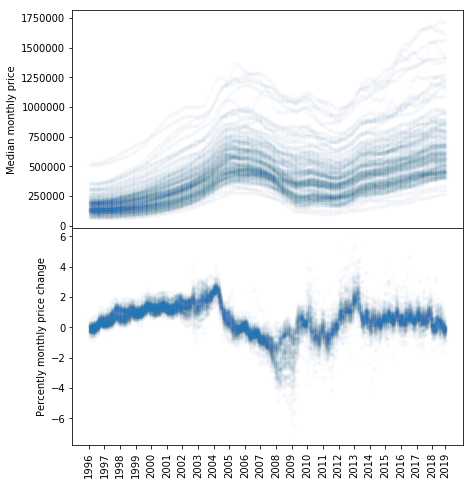

In [67]:
plt.figure(figsize=(7,8))
plt.subplot(2,1,1)
plt.plot(df_sd.variable, df_sd.value, '.', alpha = .01);
plt.ylabel("Median monthly price");
plt.xticks([])
plt.subplot(2,1,2)
plt.plot(df_sd.variable, df_sd.monthly_change, '.', alpha = .01);
plt.xticks(pos, labels, rotation = 90);
plt.ylabel("Percently monthly price change")
plt.subplots_adjust(wspace=0, hspace=0)

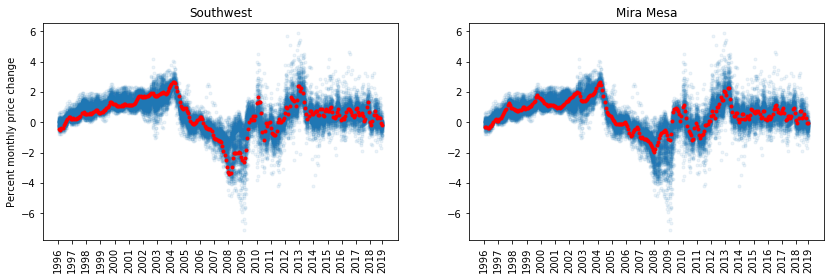

In [68]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
df_region = df_sd[df_sd.RegionName == region_names[0]]
plt.plot(df_sd.variable, df_sd.monthly_change, '.', alpha = .08);
plt.plot(df_region.variable, df_region.monthly_change, '.', color = "red")
plt.xticks(pos, labels, rotation = 90);
plt.ylabel("Percent monthly price change")
plt.title(region_names[0]);

plt.subplot(1,2,2)
df_region = df_sd[df_sd.RegionName == region_names[1]]
plt.plot(df_sd.variable, df_sd.monthly_change, '.', alpha = .08);
plt.plot(df_region.variable, df_region.monthly_change, '.', color = "red")
plt.xticks(pos, labels, rotation = 90);
plt.title(region_names[1]);



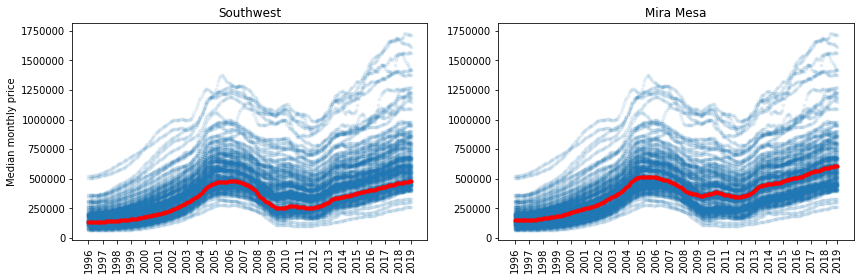

In [69]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
df_region = df_sd[df_sd.RegionName == region_names[0]]
plt.plot(df_sd.variable, df_sd.value, '.', alpha = .08);
plt.plot(df_region.variable, df_region.value, '.', color = "red")
plt.xticks(pos, labels, rotation = 90);
plt.ylabel("Median monthly price")
plt.title(region_names[0]);

plt.subplot(1,2,2)
df_region = df_sd[df_sd.RegionName == region_names[1]]
plt.plot(df_sd.variable, df_sd.value, '.', alpha = .08);
plt.plot(df_region.variable, df_region.value, '.', color = "red")
plt.xticks(pos, labels, rotation = 90);
plt.title(region_names[1]);



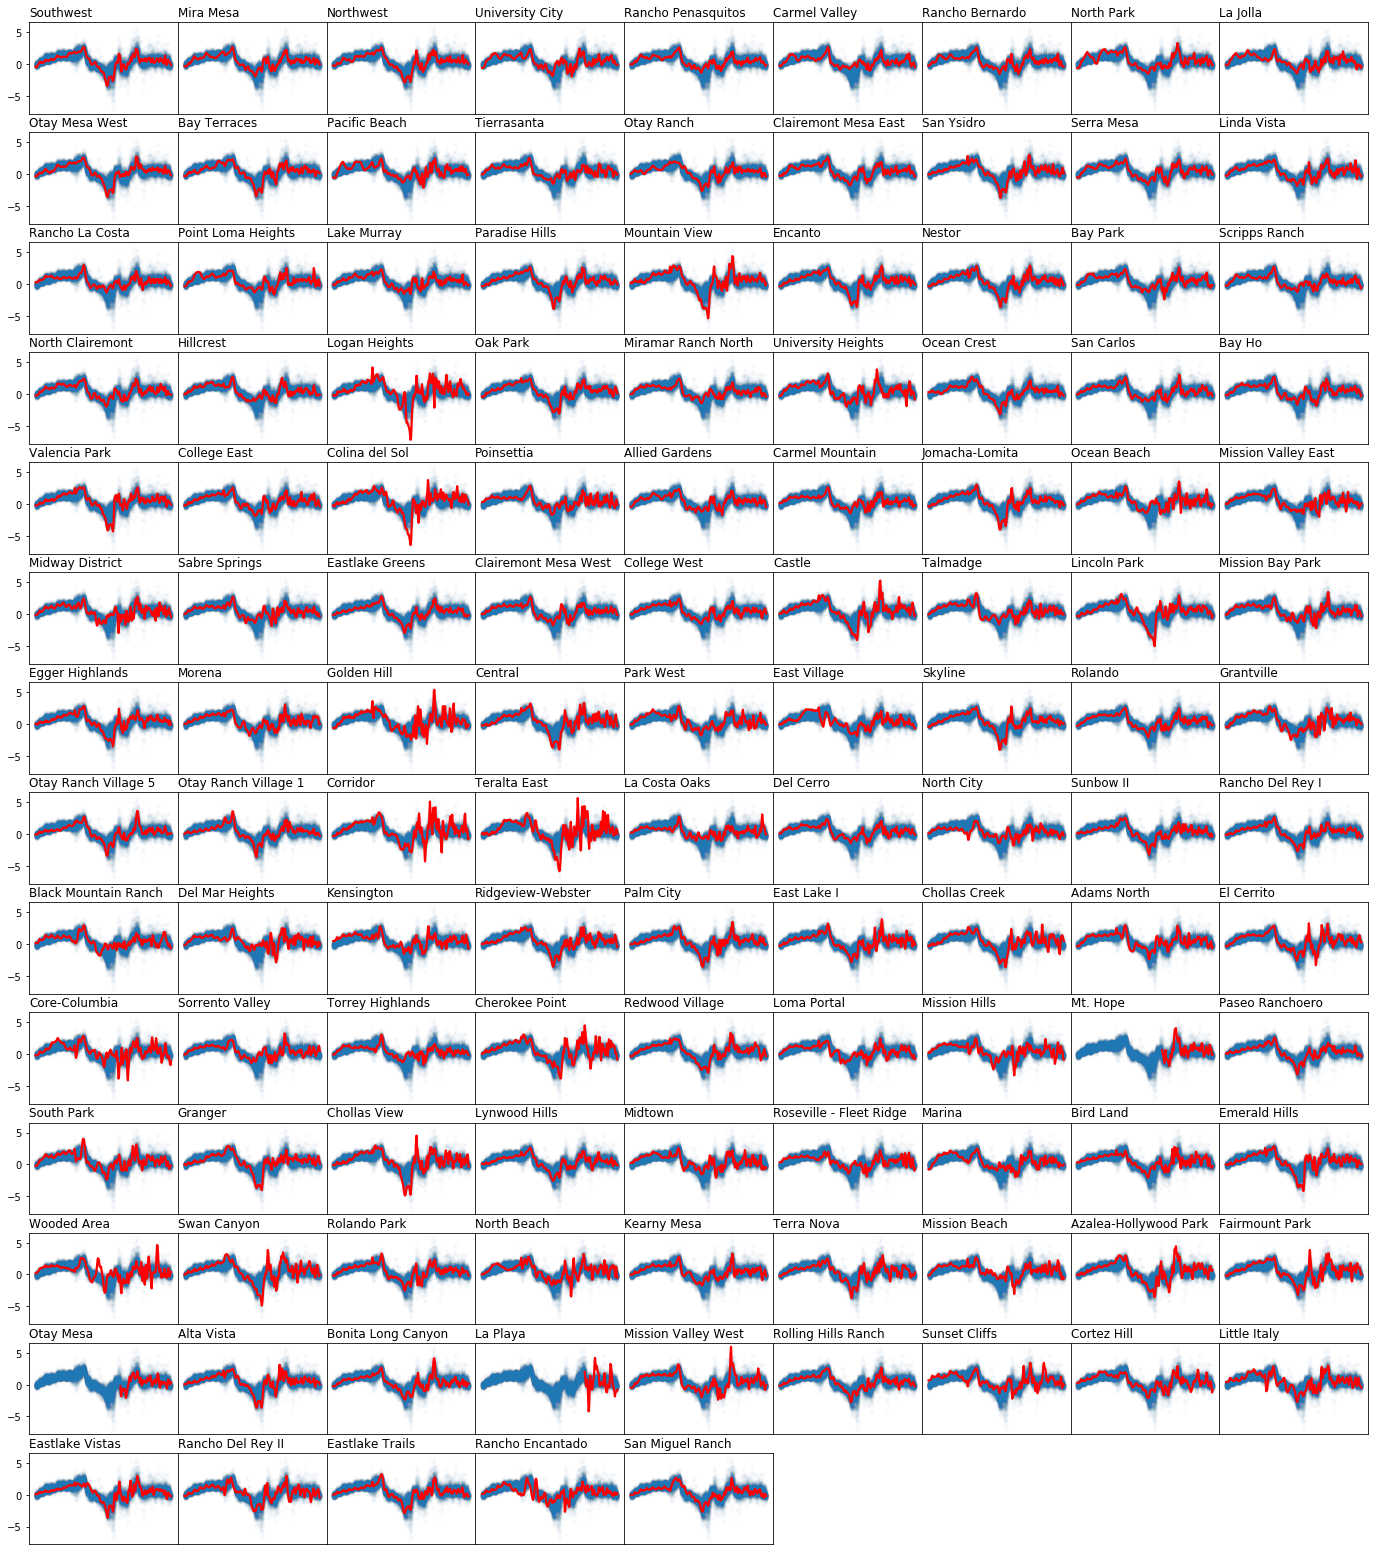

In [70]:
plt.figure(figsize = (24,28))
for i, region_name in enumerate(region_names):
    plt.subplot(14, 9, i+1)
    
    plt.plot(df_sd.variable, df_sd.monthly_change, '.', alpha = .01);
    plt.xticks([]);
    df_region = df_sd[df_sd.RegionName == region_name]
    plt.plot(df_region.variable, df_region.monthly_change, linewidth = 2.2, 
             color = "r", label = region_name)

    plt.xticks([]);
    if i%9 != 0:
        plt.yticks([])
    
    plt.title(region_name, loc = "left")
    plt.subplots_adjust(wspace=0, hspace=.2)

Let's compare the distribution of percent changes between two different states: early bubble state and present state we are at in the Real Estate market. 

In [71]:
df_bubble_leadup = df_sd[(df_sd.variable>="2000-01") & (df_sd.variable<"2005-01")]

df_current_state = df_sd[(df_sd.variable>"2014-02") & (df_sd.variable<="2019-02")]

df_bubble_leadup.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,variable,value,monthly_change
334841,343228,Southwest,Chula Vista,CA,San Diego-Carlsbad,San Diego County,87,2000-01,172400.0,1.352146
334843,116625,Mira Mesa,San Diego,CA,San Diego-Carlsbad,San Diego County,89,2000-01,206300.0,1.776024
334912,343244,Northwest,Chula Vista,CA,San Diego-Carlsbad,San Diego County,158,2000-01,178800.0,1.188455
334923,118673,University City,San Diego,CA,San Diego-Carlsbad,San Diego County,169,2000-01,262300.0,1.587916
334929,117557,Rancho Penasquitos,San Diego,CA,San Diego-Carlsbad,San Diego County,175,2000-01,291300.0,1.462905


Are the differences between the current state and the bubble state the same or different? Let's estimate some $p$-values for this.

In [72]:
from scipy import stats

In [73]:
p_vals = []
median_diffs = []
for region in region_names:
    df_bubble_leadup_region = df_bubble_leadup[df_bubble_leadup.RegionName == region].dropna()
    df_current_state_region = df_current_state[df_current_state.RegionName == region].dropna()
    if (df_bubble_leadup_region.shape[0] == 0) or (df_current_state_region.shape[0]==0):
        continue
    _, p_val = stats.ttest_ind(df_bubble_leadup_region.monthly_change, 
                               df_current_state_region.monthly_change)
    p_vals.append(p_val)
    
    median_diffs.append(np.median(np.abs(df_current_state_region.monthly_change)) - 
                        np.median(np.abs(df_bubble_leadup_region.monthly_change)))

## Volcano Plot

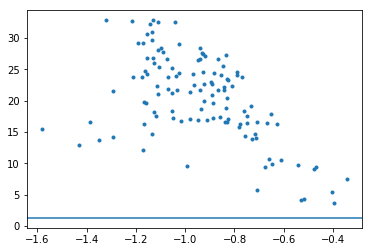

In [74]:

plt.plot(median_diffs, -np.log10(p_vals), '.');
plt.axhline(-np.log10(.05))


## Box Plot

In [75]:
df_bubble_leadup["state"] = "bubble"
df_current_state["state"] = "current"


df_box_plot = pd.concat([df_bubble_leadup, df_current_state], axis = 0)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


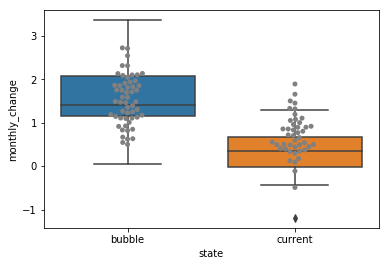

In [77]:

ax = sns.boxplot(x='state', y='monthly_change', data=df_box_plot.sample(100))

ax = sns.swarmplot(x='state', y='monthly_change', data=df_box_plot.sample(100), color="grey")


In [78]:
df_sd.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,variable,value,monthly_change
86,343228,Southwest,Chula Vista,CA,San Diego-Carlsbad,San Diego County,87,1996-04,139400.0,NaN
88,116625,Mira Mesa,San Diego,CA,San Diego-Carlsbad,San Diego County,89,1996-04,153900.0,NaN
157,343244,Northwest,Chula Vista,CA,San Diego-Carlsbad,San Diego County,158,1996-04,147600.0,NaN
168,118673,University City,San Diego,CA,San Diego-Carlsbad,San Diego County,169,1996-04,175700.0,NaN
174,117557,Rancho Penasquitos,San Diego,CA,San Diego-Carlsbad,San Diego County,175,1996-04,202400.0,NaN


In [79]:
from sklearn.gaussian_process import GaussianProcessRegressor

In [80]:
gp = GaussianProcessRegressor()

In [82]:
df_sd.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,variable,value,monthly_change
86,343228,Southwest,Chula Vista,CA,San Diego-Carlsbad,San Diego County,87,1996-04,139400.0,NaN
88,116625,Mira Mesa,San Diego,CA,San Diego-Carlsbad,San Diego County,89,1996-04,153900.0,NaN
157,343244,Northwest,Chula Vista,CA,San Diego-Carlsbad,San Diego County,158,1996-04,147600.0,NaN
168,118673,University City,San Diego,CA,San Diego-Carlsbad,San Diego County,169,1996-04,175700.0,NaN
174,117557,Rancho Penasquitos,San Diego,CA,San Diego-Carlsbad,San Diego County,175,1996-04,202400.0,NaN


In [83]:
df_mira_mesa = df_sd[df_sd.RegionID==116625]



In [84]:
df_mira_mesa.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,variable,value,monthly_change
88,116625,Mira Mesa,San Diego,CA,San Diego-Carlsbad,San Diego County,89,1996-04,153900.0,NaN
7527,116625,Mira Mesa,San Diego,CA,San Diego-Carlsbad,San Diego County,89,1996-05,153400.0,-0.324886
14966,116625,Mira Mesa,San Diego,CA,San Diego-Carlsbad,San Diego County,89,1996-06,152900.0,-0.325945
22405,116625,Mira Mesa,San Diego,CA,San Diego-Carlsbad,San Diego County,89,1996-07,152300.0,-0.392413
29844,116625,Mira Mesa,San Diego,CA,San Diego-Carlsbad,San Diego County,89,1996-08,151700.0,-0.393959


In [85]:
df_mira_mesa.shape

(275, 10)

In [88]:
from IPython.display import display, HTML

# # Assuming that dataframes df1 and df2 are already defined:
# print "Dataframe 1:"
# display(df1)
# print "Dataframe 2:"
# display(HTML(df2.to_html()))

In [90]:
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     display(HTML(df_mira_mesa.to_html()))

In [91]:
df_sd.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,variable,value,monthly_change
86,343228,Southwest,Chula Vista,CA,San Diego-Carlsbad,San Diego County,87,1996-04,139400.0,NaN
88,116625,Mira Mesa,San Diego,CA,San Diego-Carlsbad,San Diego County,89,1996-04,153900.0,NaN
157,343244,Northwest,Chula Vista,CA,San Diego-Carlsbad,San Diego County,158,1996-04,147600.0,NaN
168,118673,University City,San Diego,CA,San Diego-Carlsbad,San Diego County,169,1996-04,175700.0,NaN
174,117557,Rancho Penasquitos,San Diego,CA,San Diego-Carlsbad,San Diego County,175,1996-04,202400.0,NaN


In [97]:
# df_sd[(df_sd.City=="San Diego")  | (df_sd.City=="Chula Vista")]

In [102]:
df_sd.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,variable,value,monthly_change
86,343228,Southwest,Chula Vista,CA,San Diego-Carlsbad,San Diego County,87,1996-04,139400.0,NaN
88,116625,Mira Mesa,San Diego,CA,San Diego-Carlsbad,San Diego County,89,1996-04,153900.0,NaN
157,343244,Northwest,Chula Vista,CA,San Diego-Carlsbad,San Diego County,158,1996-04,147600.0,NaN
168,118673,University City,San Diego,CA,San Diego-Carlsbad,San Diego County,169,1996-04,175700.0,NaN
174,117557,Rancho Penasquitos,San Diego,CA,San Diego-Carlsbad,San Diego County,175,1996-04,202400.0,NaN


In [105]:
153900 - 139400.0

14500.0

In [106]:
#df_sd.value.diff()

In [ ]:
def little_function(x):
    return x + 10

In [109]:
df_sd.groupby(["RegionName", "State"])["value"].median().head()

RegionName             State
Adams North            CA       414400.0
Allied Gardens         CA       398800.0
Alta Vista             CA       301600.0
Azalea-Hollywood Park  CA       253800.0
Bay Ho                 CA       463600.0
Name: value, dtype: float64

In [108]:
df_sd.groupby(["RegionName", "State"])["value"].apply(lambda x: np.median(x))

/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:4033: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


RegionName               State
Adams North              CA        414400.0
Allied Gardens           CA        398800.0
Alta Vista               CA        301600.0
Azalea-Hollywood Park    CA        253800.0
Bay Ho                   CA        463600.0
Bay Park                 CA        509800.0
Bay Terraces             CA        296500.0
Bird Land                CA        375700.0
Black Mountain Ranch     CA        769200.0
Bonita Long Canyon       CA        530900.0
Carmel Mountain          CA        523100.0
Carmel Valley            CA        742300.0
Castle                   CA        227100.0
Central                  CA        238000.0
Cherokee Point           CA        264600.0
Chollas Creek            CA        279700.0
Chollas View             CA        235900.0
Clairemont Mesa East     CA        390900.0
Clairemont Mesa West     CA        438500.0
Colina del Sol           CA        144300.0
College East             CA        365700.0
College West             CA        440200.0
C